In [2]:
# !wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Video_Games_5.json.gz
# !gzip -d -k Video_Games_5.json.gz

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import gensim

In [4]:
df = pd.read_json('Video_Games_5.json', orient='records', lines=True)
df.shape

(497577, 12)

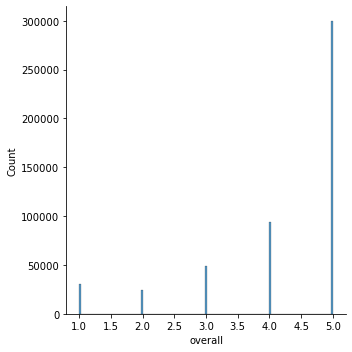

In [5]:
sns.displot(df['overall'])

In [6]:
df_no3 = df[df['overall'].isin([1,2,4,5])]
print(df_no3.shape)
df_no3.head(3)

(448431, 12)


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN


In [7]:
dict_class = {
    1 : 0,
    2 : 0,
    4 : 1,
    5 : 1
}

# map reviews to sentiment classification
df_no3['sentiment'] = df_no3['overall'].map(dict_class)
df_no3['rev_sum'] = df_no3['summary'] + ' ' + df_no3['reviewText']
# df_no3.head(3)

# get only relevant columns
df_games = pd.DataFrame()
df_games = df_no3[['rev_sum', 'sentiment']]
df_games.shape

/tmp/ipykernel_149/2452910105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no3['sentiment'] = df_no3['overall'].map(dict_class)
/tmp/ipykernel_149/2452910105.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no3['rev_sum'] = df_no3['summary'] + ' ' + df_no3['reviewText']


(448431, 2)

In [8]:
from sklearn.model_selection import train_test_split

X_game, y_game = df_games['rev_sum'], df_games['sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X_game, y_game, test_size=0.2, train_size = 0.8, stratify=y_game, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, train_size = 0.5, stratify=y_temp, random_state=42)

In [9]:
X_train.shape, X_dev.shape, X_test.shape

((358744,), (44843,), (44844,))

# Similarity
from https://dev.to/thepylot/compare-documents-similarity-using-python-nlp-4odp

In [10]:
list(X_train[0:100])[0]

"hmmmm, what was I thinking I bought this for my PSP so that if I was traveling with the kids they could play it (as opposed to their leapster).  Well it is too difficult for them, and for me as an adult it is my last choice.  For a 8-12 year old, it is probably good, I just can't rate it high for myself or my kids."

In [11]:
# X_train[:100].to_csv('X_train_100.txt', index=False)
X_train_100 = list(X_train[:100])
X_train_1000 = list(X_train[:1000])
total_diff = 'My house is really small and this vacuum cleaner is perfect for it! Has enough power to pick up debris and clean carpets.'

In [12]:
# one big string
df = pd.DataFrame(X_train_100)
X_train_joint = ' '.join(df[0].astype(str))

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import gensim

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [14]:
# list of strings, paragraph to sentences
file_docs = sent_tokenize(X_train_joint)
file2_docs = sent_tokenize(X_train_100[0])
file3_docs = sent_tokenize(total_diff)

In [15]:
def compare_text(corpus1, corpus2):
    
    # tokenize corpus into sentences
    # list of strings
    first = sent_tokenize(corpus1)
    second = sent_tokenize(corpus2)

    # list of lists, words as tokens for corpus 1
    gen_docs = [[w.lower() for w in word_tokenize(text)] for text in first]

    dictionary = gensim.corpora.Dictionary(gen_docs)
    corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]
    tf_idf = gensim.models.TfidfModel(corpus)

    # # building the index
    sims = gensim.similarities.Similarity('workdir/', tf_idf[corpus], num_features=len(dictionary))

    for line in second:
        # list of lists, words as tokens for corpus 2
        query_doc = [w.lower() for w in word_tokenize(line)]

        # update an existing dictionary and create bag of words
        query_doc_bow = dictionary.doc2bow(query_doc)

    query_doc_tf_idf = tf_idf[query_doc_bow]

    sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))
    print(sum_of_sims)

    print('Comparing Result:', sims[query_doc_tf_idf]) 
    
    # percentage_of_similarity = round(float((sum_of_sims / len(file_docs))))
    # print(percentage_of_similarity)


In [16]:
X_train_100[0]

"hmmmm, what was I thinking I bought this for my PSP so that if I was traveling with the kids they could play it (as opposed to their leapster).  Well it is too difficult for them, and for me as an adult it is my last choice.  For a 8-12 year old, it is probably good, I just can't rate it high for myself or my kids."

In [17]:
X_train_100[3]

"Racing at its console best. EA sports has neared perfection.  They could only make very few improvements.  Such as matching your pit box with your starting position in the race.  Having the weather affect the track to some degree.  Otherwise this game is screaming.  My only gripe, is the fantasy super speedway you can unlock you have to race the wrong direction on.  Racing a track the opposite direction at 239 miles per hour (thats right no restrictor plates on this track).  I bought this game right away and haven't had the first regret since.  By the way, in carreer mode you can sign up with a sponsor that lets you drive the earnhardt #3 car.  :)"

In [18]:
compare_text(X_train_100[0], X_train_100[3])
compare_text(X_train_100[0], X_train_100[2])
compare_text(X_train_100[0], X_train_100[1])
compare_text(X_train_100[0], X_train_100[0])
compare_text(X_train_100[0], total_diff)

0.19426325
Comparing Result: [0.19426325 0.         0.        ]
0.5719042
Comparing Result: [0.16823691 0.08832876 0.31533852]
0.8307915
Comparing Result: [0.2721454  0.1428834  0.41576266]
1.0516691
Comparing Result: [0.02890523 0.02276399 0.99999994]
0.35372525
Comparing Result: [0.13736486 0.21636038 0.        ]


In [19]:
X_train_100[0]

"hmmmm, what was I thinking I bought this for my PSP so that if I was traveling with the kids they could play it (as opposed to their leapster).  Well it is too difficult for them, and for me as an adult it is my last choice.  For a 8-12 year old, it is probably good, I just can't rate it high for myself or my kids."

In [20]:
X_train_100[3]

"Racing at its console best. EA sports has neared perfection.  They could only make very few improvements.  Such as matching your pit box with your starting position in the race.  Having the weather affect the track to some degree.  Otherwise this game is screaming.  My only gripe, is the fantasy super speedway you can unlock you have to race the wrong direction on.  Racing a track the opposite direction at 239 miles per hour (thats right no restrictor plates on this track).  I bought this game right away and haven't had the first regret since.  By the way, in carreer mode you can sign up with a sponsor that lets you drive the earnhardt #3 car.  :)"

In [21]:
total_diff

'My house is really small and this vacuum cleaner is perfect for it! Has enough power to pick up debris and clean carpets.'

In [22]:
# X_train_joint

In [23]:
compare_text(X_train_joint, X_train_100[3])
compare_text(X_train_joint, X_train_100[2])
compare_text(X_train_joint, X_train_100[1])
compare_text(X_train_joint, X_train_100[0])
compare_text(X_train_joint, total_diff)

7.4918284
Comparing Result: [0.08128969 0.         0.         0.         0.         0.
 0.         0.         0.         0.3230962  0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.08155163 0.         0.
 0.         0.         0.         0.         0.         0.07400901
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.06878629 0.         0.         0.21416041 0.         0.
 0.         0.         0.         0.1005437  0.         0.10265557
 0.0732097  0.         0.17486972 0.         0.0944374  0.
 0.         0.         0.         0.         0.11179182 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.10755602
 0. 

# Gensim tut
https://www.machinelearningplus.com/nlp/gensim-tutorial/

In [24]:
import gensim
from gensim import corpora
from pprint import pprint

# How to create a dictionary from a list of sentences?
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

documents_2 = ["One source says the report will likely conclude that", 
                "the operation was carried out without clearance and", 
                "transparency and that those involved will be held", 
                "responsible. One of the sources acknowledged that the", 
                "report is still being prepared and cautioned that", 
                "things could change."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]

In [25]:
print(texts)

[['The', 'Saudis', 'are', 'preparing', 'a', 'report', 'that', 'will', 'acknowledge', 'that'], ['Saudi', 'journalist', 'Jamal', "Khashoggi's", 'death', 'was', 'the', 'result', 'of', 'an'], ['interrogation', 'that', 'went', 'wrong,', 'one', 'that', 'was', 'intended', 'to', 'lead'], ['to', 'his', 'abduction', 'from', 'Turkey,', 'according', 'to', 'two', 'sources.']]


In [26]:
for i in texts:
    print(i)

['The', 'Saudis', 'are', 'preparing', 'a', 'report', 'that', 'will', 'acknowledge', 'that']
['Saudi', 'journalist', 'Jamal', "Khashoggi's", 'death', 'was', 'the', 'result', 'of', 'an']
['interrogation', 'that', 'went', 'wrong,', 'one', 'that', 'was', 'intended', 'to', 'lead']
['to', 'his', 'abduction', 'from', 'Turkey,', 'according', 'to', 'two', 'sources.']


In [27]:
# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary.token2id)

{'Saudis': 0, 'The': 1, 'a': 2, 'acknowledge': 3, 'are': 4, 'preparing': 5, 'report': 6, 'that': 7, 'will': 8, 'Jamal': 9, "Khashoggi's": 10, 'Saudi': 11, 'an': 12, 'death': 13, 'journalist': 14, 'of': 15, 'result': 16, 'the': 17, 'was': 18, 'intended': 19, 'interrogation': 20, 'lead': 21, 'one': 22, 'to': 23, 'went': 24, 'wrong,': 25, 'Turkey,': 26, 'abduction': 27, 'according': 28, 'from': 29, 'his': 30, 'sources.': 31, 'two': 32}


In [28]:
from gensim.utils import simple_preprocess
from smart_open import smart_open
import os

# List with 2 sentences
my_docs = ["Who let the dogs out?",
           "Who? Who? Who? Who?"]

# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]

# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
pprint(mycorpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(4, 4)]]


In [29]:
tokenized_list

[['who', 'let', 'the', 'dogs', 'out'], ['who', 'who', 'who', 'who']]

# Compare sentences

In [30]:
gensim.__version__

'4.1.2'

In [31]:
X_train_100 = list(X_train[:100])

In [32]:
# one big string
df = pd.DataFrame(X_train_100)
X_train_joint = ' '.join(df[0].astype(str))

In [33]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sabrina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def tokenize(string):
    '''
    Input: A string, can contain multiple sentences.
    Output: A list of lists where each sublist is a sentence and the strings in it are the tokenised words.
    '''
    # list of strings
    sentences = sent_tokenize(string)
    # sentences = string.lower()

    # list of lists, words as tokens for corpus 1
    tokens = [[word.lower() for word in word_tokenize(text)] for text in sentences]
    # tokens = [word_tokenize(sentences)]

    return tokens

In [35]:
tokens = tokenize(X_train_100[0])
print(tokens)
print('\ntokens len = num. of sentences in string =', len(tokens))

[['hmmmm', ',', 'what', 'was', 'i', 'thinking', 'i', 'bought', 'this', 'for', 'my', 'psp', 'so', 'that', 'if', 'i', 'was', 'traveling', 'with', 'the', 'kids', 'they', 'could', 'play', 'it', '(', 'as', 'opposed', 'to', 'their', 'leapster', ')', '.'], ['well', 'it', 'is', 'too', 'difficult', 'for', 'them', ',', 'and', 'for', 'me', 'as', 'an', 'adult', 'it', 'is', 'my', 'last', 'choice', '.'], ['for', 'a', '8-12', 'year', 'old', ',', 'it', 'is', 'probably', 'good', ',', 'i', 'just', 'ca', "n't", 'rate', 'it', 'high', 'for', 'myself', 'or', 'my', 'kids', '.']]

tokens len = num. of sentences in string = 3


In [36]:
dictionary = gensim.corpora.Dictionary(tokens)
# dictionary.token2id

In [37]:
corpus = [dictionary.doc2bow(token) for token in tokens]
# corpus
# (0, 1) means the word with id=0 appears once in the 1st sentence.

In [38]:
# # word frequency in corpus
# for doc in corpus:
#     print([[dictionary[id], freq] for id, freq in doc])

In [39]:
tf_idf = gensim.models.TfidfModel(corpus)
# used tfid to weight down frequent words

# # print if you want to see what it looks like
# for doc in tf_idf[corpus]:
#     print([[dictionary[id], np.around(freq, decimals=2)] for id, freq in doc])

The class similarities.MatrixSimilarity is only appropriate when the whole set of vectors fits into memory. For example, a corpus of one million documents would require 2GB of RAM in a 256-dimensional LSI space, when used with this class.

Without 2GB of free RAM, you would need to use the similarities.Similarity class. This class operates in fixed memory, by splitting the index across multiple files on disk, called shards. It uses similarities.MatrixSimilarity and similarities.SparseMatrixSimilarity internally, so it is still fast, although slightly more complex.

From gensim docs: https://radimrehurek.com/gensim/auto_examples/core/run_similarity_queries.html

In [40]:
sims = gensim.similarities.Similarity('workdir/', tf_idf[corpus], num_features=len(dictionary))
print(sims)
print(type(sims))

Similarity index with 3 documents in 0 shards (stored under workdir/)
<class 'gensim.similarities.docsim.Similarity'>


In [41]:
def make_dict(tokens):
    '''
    Input: A list of lists where each sublist is a sentence and the strings in it are the tokenised words.
    Output: returns indexed similarities
    '''
    dictionary = gensim.corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    tf_idf = gensim.models.TfidfModel(corpus)
    sims = gensim.similarities.Similarity('workdir/', tf_idf[corpus], num_features=len(dictionary))
    print(sims)
    return sims

How to query using gensim: https://stackoverflow.com/questions/51287590/how-to-use-gensim-similarities-similarity-to-find-similarity-between-two-sentenc

In [46]:
def query_sim(string):
    query = [w.lower() for w in word_tokenize(string)] # tokenise into strings
    # print(query)
    query_bow = dictionary.doc2bow(query) # bag of words for string being queried
    query_tf_idf = tf_idf[query_bow] # ??? 
    
    # get similarity scores between given string and indexes text
    sim_score =  sims[query_tf_idf]
    # print(len(sim_score), sim_score)

    # return the avarage sim between the queried string and all sentences in the indexed text - in the case review(s)
    return sum(sim_score) / len(sim_score)

In [47]:
query_sim('Nature is good for your mental health.'), query_sim('My house is really small and this vacuum cleaner is perfect for it! Has enough power to pick up debris and clean carpets.')

(0.12309919794400533, 0.16177424291769663)

In [48]:
sim_list = [] # similarities between each review and the full corpus
for i in range(len(X_train_100)):
    sim_list.append(round(query_sim(X_train_100[i]),3))

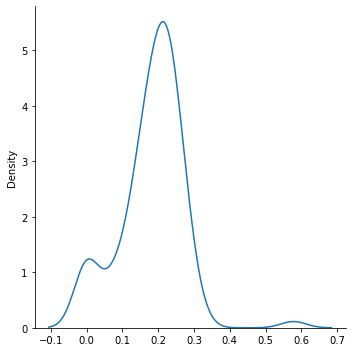

In [49]:
sns.displot(sim_list, kind='kde');

# Functions test

In [50]:
import gensim
from nltk.tokenize import word_tokenize, sent_tokenize

def tokenize(string):
    '''
    Input: A string, can contain multiple sentences.
    Output: A list of lists where each sublist is a sentence and the strings in it are the tokenised words.
    '''
    # list of strings
    sentences = sent_tokenize(string)
    # sentences = string.lower()

    # list of lists, words as tokens for corpus 1
    tokens = [[word.lower() for word in word_tokenize(text)] for text in sentences]
    # tokens = [word_tokenize(sentences)]

    return tokens

def make_dict(tokens):
    '''
    Input: A list of lists where each sublist is a sentence and the strings in it are the tokenised words.
    Output: returns indexed similarities
    '''
    dictionary = gensim.corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(token) for token in tokens]
    tf_idf = gensim.models.TfidfModel(corpus)
    sims = gensim.similarities.Similarity('workdir/', tf_idf[corpus], num_features=len(dictionary))
    print(sims)
    return dictionary, tf_idf, sims


def compare(string_index, string_query):
    tokens = tokenize(string_index)
    dictionary, tf_idf, sims = make_dict(tokens)

    query = [w.lower() for w in word_tokenize(string_query)] # tokenise into strings
    # print(query)
    query_bow = dictionary.doc2bow(query) # bag of words for string being queried
    query_tf_idf = tf_idf[query_bow] # ??? 
    
    # get similarity scores between given string and indexes text
    sim_score =  sims[query_tf_idf]
    # print(len(sim_score), sim_score)

    # return the avarage sim between the queried string and all sentences in the indexed text - in the case review(s)
    return sum(sim_score) / len(sim_score)

In [61]:
X_train_100 = list(X_train[:100])

docs = [
    'Nature is good for your mental health.', 
    'My house is really small and this vacuum cleaner is perfect for it! Has enough power to pick up debris and clean carpets.'
]

compare(docs[0], docs[1])

Similarity index with 1 documents in 0 shards (stored under workdir/)


0.0

In [62]:
X_train_100[0], X_train_100[1]

("hmmmm, what was I thinking I bought this for my PSP so that if I was traveling with the kids they could play it (as opposed to their leapster).  Well it is too difficult for them, and for me as an adult it is my last choice.  For a 8-12 year old, it is probably good, I just can't rate it high for myself or my kids.",
 "the best video game ever if you don't have this game\nyou can stop call yourself a PC gamer\nbecause you're not\n\nRainbow Six Vegas 2\nit's not only a good game\nbut is better of battlefield 3 and 4\nespecially in co op mode\nI buy Rainbow Six Vegas 2 yesterday and I play for 8hr 39mins\n\n*graphic 5 stars\n*co op mode 5 stars\n*gameplay 5 stars\n*interface 5 stars\n*sound 5 stars\n*connectivity 5 stars\n\nyou can't go wrong with Rainbow Six Vegas 2\noh PS rainbow six Vegas 2 run just fine with windows 7 64bit")

In [63]:
compare(X_train_100[0], X_train_100[1])

Similarity index with 3 documents in 0 shards (stored under workdir/)


0.27693048616250354

In [64]:
docs[1], X_train_100[1]

('My house is really small and this vacuum cleaner is perfect for it! Has enough power to pick up debris and clean carpets.',
 "the best video game ever if you don't have this game\nyou can stop call yourself a PC gamer\nbecause you're not\n\nRainbow Six Vegas 2\nit's not only a good game\nbut is better of battlefield 3 and 4\nespecially in co op mode\nI buy Rainbow Six Vegas 2 yesterday and I play for 8hr 39mins\n\n*graphic 5 stars\n*co op mode 5 stars\n*gameplay 5 stars\n*interface 5 stars\n*sound 5 stars\n*connectivity 5 stars\n\nyou can't go wrong with Rainbow Six Vegas 2\noh PS rainbow six Vegas 2 run just fine with windows 7 64bit")

In [65]:
compare(docs[1], X_train_100[1])


Similarity index with 2 documents in 0 shards (stored under workdir/)


0.322748601436615

In [70]:
compare('The best thing ever. The best .', 'The best thing ever. The best .')

Similarity index with 2 documents in 0 shards (stored under workdir/)


0.4999999701976776